In [1]:
%run ../models/agent-architecture.py

# Preliminaries

## Load Word Embeddings

To create a word embedding object, the object needs a file path pointed to GloVe word embeddings from https://nlp.stanford.edu/projects/glove/ as described in Pennington et al. 2014.

The word embeddings object has two methods:

1. load_embeddings( ) - this is used to load all of the embeddings into a dictionary. The file size is roughly 2 GB depending on the specific set of embeddings.
2. get_embedding( ) - this method takes a word string and returns an embedding.

In [2]:
#Due to space limitations on github, word vector file is not uploaded
glove_6b_300 = word_embeddings('../../word_embeddings/glove.6B.300d.txt')

In [3]:
glove_6b_300.load_embeddings()

Loading Embeddings: ../../word_embeddings/glove.6B.300d.txt
Go grab a beverage. This may take some time...
-----------------------------------------------
At word  10000  :  quinn
At word  20000  :  pitting
At word  30000  :  monfils
At word  40000  :  midwife
At word  50000  :  nanda
At word  60000  :  eales
At word  70000  :  1,260
At word  80000  :  20,500
At word  90000  :  wrx
At word  100000  :  autocephalous
At word  110000  :  rejectionist
At word  120000  :  grilli
At word  130000  :  savarkar
At word  140000  :  v-league
At word  150000  :  al-quds
At word  160000  :  1,494
At word  170000  :  hilfe
At word  180000  :  champagnat
At word  190000  :  12.1-inch
At word  200000  :  soroca
At word  210000  :  movado
At word  220000  :  abassan
At word  230000  :  hazuki
At word  240000  :  dandurand
At word  250000  :  bottas
At word  260000  :  ritschl
At word  270000  :  schismatics
At word  280000  :  aarseth
At word  290000  :  golonka
At word  300000  :  katoucha
At word  31

In [4]:
## Example Embedding
glove_6b_300.get_embedding('quinn')

array([ 0.067657 ,  0.31707  ,  0.17335  ,  0.49517  , -0.43659  ,
        0.40762  ,  0.17853  , -0.19861  , -0.030561 ,  0.028715 ,
        0.2849   , -0.19515  , -0.01294  , -0.023773 ,  0.018514 ,
        0.068279 , -0.11688  ,  0.12886  ,  0.012803 ,  0.12346  ,
       -0.19171  , -0.0013463, -0.33404  ,  0.0099228,  0.13672  ,
        0.0033258, -0.11776  , -0.62765  ,  0.16715  , -0.52227  ,
       -0.19685  , -0.018773 , -0.168    ,  0.22324  , -1.2951   ,
        0.55208  ,  0.15708  ,  0.70124  ,  0.25239  , -0.40275  ,
       -0.15608  , -0.09341  , -0.47102  ,  0.08377  ,  0.34432  ,
       -0.035855 ,  0.1233   , -0.36519  ,  0.27029  ,  0.20856  ,
       -0.31784  ,  0.17809  , -0.33289  ,  0.35023  ,  0.22175  ,
       -0.18175  , -0.22117  ,  0.14903  , -0.60117  , -0.33642  ,
       -0.31008  ,  0.23626  , -0.32179  ,  0.11275  , -0.16623  ,
       -0.35505  ,  0.28151  ,  0.027157 , -0.04567  , -0.67872  ,
       -0.3632   , -0.15104  ,  0.0321   , -0.041342 , -0.0967

# Agent for Experiment Set 1

To instantiate the agent for the first set of experiments, the agent needs to have a pointer to the embedding object.

In [5]:
agent = agent_experiment_1(word_embeddings_object=glove_6b_300)

In [6]:
agent.perceive(prompt="test test test", options=["test test test", "test cat test", "test dog cat"])

In [7]:
agent.evaluations

[]

In [8]:
agent.evaluate_perceptions() 
## returns the evaluations and stores them in agent.evaluate

[0.9999999999999999, 0.9241331771565111, 0.6031059183354991]

In [9]:
agent.evaluations

[0.9999999999999999, 0.9241331771565111, 0.6031059183354991]

# Illustration of Agent on Linda Problem
In the following, an example of the Linda problem is given to illustrate how the agent uses phrases.

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
prompt = "Linda is 31 years old, single, outspoken and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in antinuclear demonstrations. Which of the following is most probable?"
options = [ "Linda is a bank teller.",
"Linda is a bank teller and active in the feminist movement.",
"Linda is a feminist."
]

In [12]:
agent.perceive(prompt=prompt, options=options)

In [13]:
agent.evaluate_perceptions()

[0.2744873996226564, 0.5923732736455332, 0.35307643353440243]

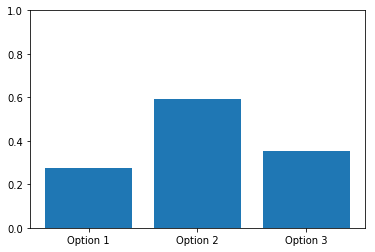

In [15]:
plt.bar(["Option 1","Option 2","Option 3"],agent.evaluations)
plt.ylim((0,1))
plt.show()

### Comments on the Agent Response

Here the agent evaluates each according to cosine similarity. Option 2, which associative memory theory predicts would be chosen, the agent would select using an argmax criteria. This result is similar to results from Bhatia 2017.

# Experiments on Set of Prompts


In [16]:
import pandas as pd

In [17]:
#prompts and options
prompts = pd.read_excel('../data/agent-validation-experiments.xlsx')

Question 1 :  Linda is 31 years old, single, outspoken and very bright. She majored in philosophy. As a student, she was deeply concerned with issues of discrimination and social justice, and also participated in antinuclear demonstrations. Which of the following is most probable?


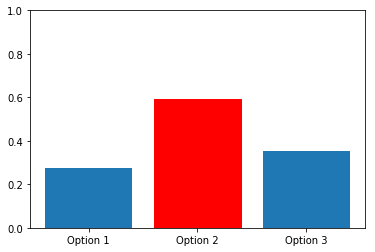

Options  1 :  Linda is a bank teller.  ||| Value:  0.2744873996226564
Options  2 :  Linda is a bank teller and active in the feminist movement.  ||| Value:  0.5923732736455332
Options  3 :  Linda is a feminist.  ||| Value:  0.35307643353440243
                      
**********************
                      
Question 2 :  Bill is 34 years old. He is intelligent, but unimaginative, compulsive, and generally lifeless. In school, he was strong in mathematics but weak in social studies and humanities. 


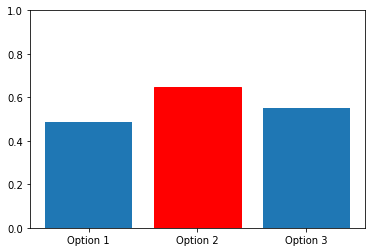

Options  1 :  Bill plays jazz for a hobby   ||| Value:  0.4883070170239979
Options  2 :  Bill is an accountant who plays jazz for a hobby   ||| Value:  0.6485869955563022
Options  3 :  Bill is an accountant.  ||| Value:  0.5490311957424664
                      
**********************
                      
Question 3 :  An agricultural crop has been planted in a field near a stream, and is expected to begin growing soon. There are weeds in the field. A herbicide is going to be sprayed. Which is most probable:


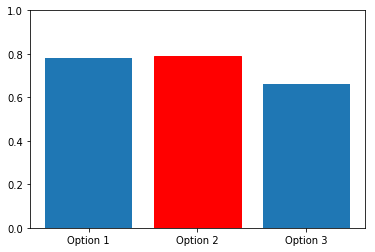

Options  1 :  The chemical will get into the water  ||| Value:  0.7826915950696346
Options  2 :  The chemical will kill the weeds and get into the water  ||| Value:  0.7879875059735776
Options  3 :  The chemical will kill the weeds  ||| Value:  0.6605611284087188
                      
**********************
                      
Question 4 :  An agricultural crop has been planted in a field near a stream, and is expected to begin growing soon. Synthetic fertilizers are going to be applied soon. Which of the following is most likely:


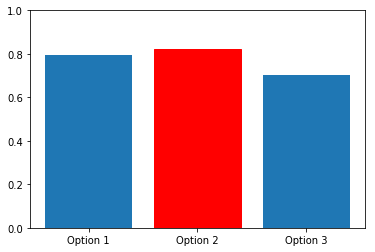

Options  1 :  The fertilizer will get into the water.  ||| Value:  0.7945629196350106
Options  2 :  The fertilizer will increase crop yields and get into the water.  ||| Value:  0.8229454627111288
Options  3 :  The fertilizer will increase crop yields.  ||| Value:  0.7016169901727858
                      
**********************
                      
Question 5 :  You are considering planting a cover crop after corn. Which of the following is most likely?


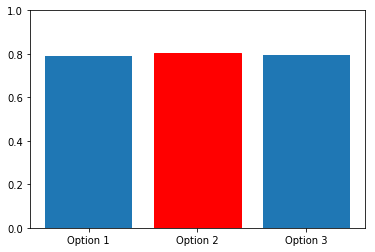

Options  1 :  The cover crop will improve soil health.  ||| Value:  0.7881213542798842
Options  2 :  The cover crop will reduce corn yield and improve soil health.  ||| Value:  0.8018572192977709
Options  3 :  The cover crop will reduce corn yield.  ||| Value:  0.794603115105993
                      
**********************
                      
Question 6 :  You are considering applying manure to alfalfa.


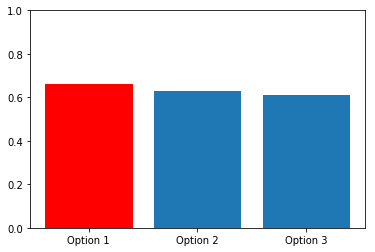

Options  1 :  The manure will improve crop yields.  ||| Value:  0.6601123974988047
Options  2 :  The manure will improve soil fertility and crop yields.  ||| Value:  0.6302930273170692
Options  3 :  The manure will improve soil fertility.  ||| Value:  0.6085408530048092
                      
**********************
                      
Question 7 :  You are considering applying manure to a corn crop.


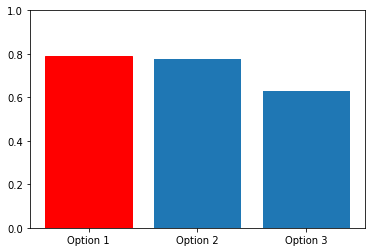

Options  1 :  The manure will improve crop yields.  ||| Value:  0.7890262614751279
Options  2 :  The manure will pollute the ground water and increase crop yields.  ||| Value:  0.7751724444160696
Options  3 :  The manure will pollute the ground water.  ||| Value:  0.6293599736219497
                      
**********************
                      
Question 8 :  You are considering applying an insecticide to an apple orchard.


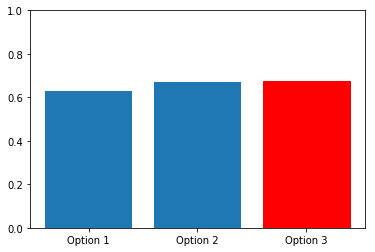

Options  1 :  It will kill the pests.  ||| Value:  0.6271506198491312
Options  2 :  It will kill the pests and make people sick.  ||| Value:  0.6718056890177121
Options  3 :  It will make people sick.  ||| Value:  0.6739928680825131
                      
**********************
                      
Question 9 :  You are considering applying an insecticide to a corn crop.


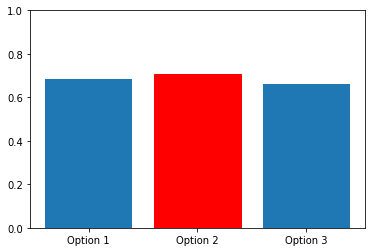

Options  1 :  It will kill the pests.  ||| Value:  0.6830976977261595
Options  2 :  It will kill the pests and make people sick.  ||| Value:  0.70896945575791
Options  3 :  It will make people sick.  ||| Value:  0.661766804199312
                      
**********************
                      
Question 10 :  Farm


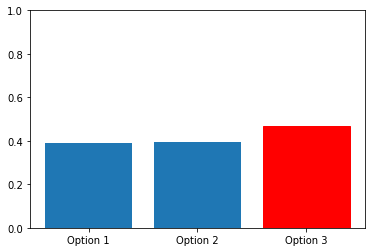

Options  1 :  The farmer values environmental sustainability.  ||| Value:  0.3898463589123848
Options  2 :  The farmer values environmental sustainability and making as much money as possible.  ||| Value:  0.3933631404158573
Options  3 :  The farmer values money.  ||| Value:  0.46796333985674315
                      
**********************
                      
Question 11 :  Urban farm


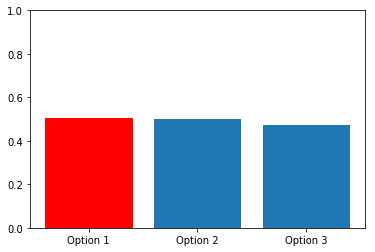

Options  1 :  The farmer values environmental sustainability.  ||| Value:  0.5037046255754252
Options  2 :  The farmer values environmental sustainability and making as much money as possible.  ||| Value:  0.4988653621252342
Options  3 :  The farmer values money.  ||| Value:  0.4741575163632403
                      
**********************
                      
Question 12 :  Conventional farm


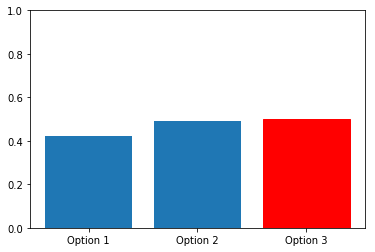

Options  1 :  The farmer values environmental sustainability.  ||| Value:  0.41996138964007057
Options  2 :  The farmer values environmental sustainability and making as much money as possible.  ||| Value:  0.4889477810171818
Options  3 :  The farmer values money.  ||| Value:  0.49858437908933056
                      
**********************
                      
Question 13 :  Organic farm


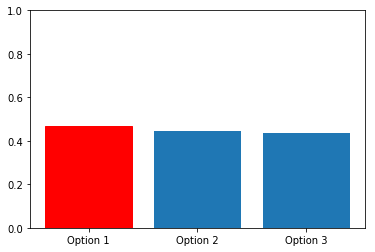

Options  1 :  The farmer values environmental sustainability.  ||| Value:  0.4679773203936214
Options  2 :  The farmer values environmental sustainability and making as much money as possible.  ||| Value:  0.4472734087789848
Options  3 :  The farmer values money.  ||| Value:  0.43786077793182165
                      
**********************
                      
Question 14 :  A farmer cares about soil health, water quality, and biodiversity.


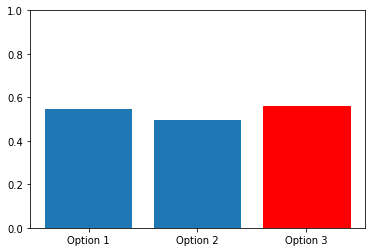

Options  1 :  The farm is organic.  ||| Value:  0.5479754563985219
Options  2 :  The farm is conventional.  ||| Value:  0.49684032837603986
Options  3 :  The farm is urban.  ||| Value:  0.5622414683041069
                      
**********************
                      
Question 15 :  A farmer cares about maximizing yield, adopting the latest technologies, and acquiring as much land as possible.


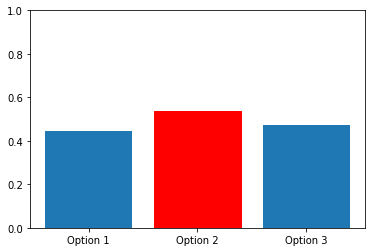

Options  1 :  The farm is organic.  ||| Value:  0.4430710924894925
Options  2 :  The farm is conventional.  ||| Value:  0.538643994965655
Options  3 :  The farm is urban.  ||| Value:  0.4710390855031186
                      
**********************
                      
Question 16 :  A person eats kale, drinks green tea, wears Patagonia, rides bike, and shops at a local food coop.


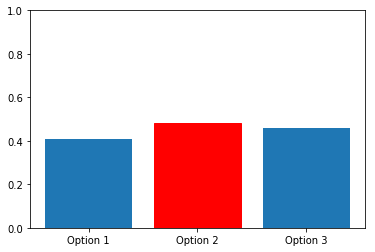

Options  1 :  The person is an environmentalist.  ||| Value:  0.4104311965601358
Options  2 :  The person is an environmentalist and values convenience.  ||| Value:  0.4827936324252561
Options  3 :  The person values convenience.  ||| Value:  0.45684871684763767
                      
**********************
                      
Question 17 :  A person eats beef, drinks soda, wears Levis, drives a truck, and shops at a grocery store.


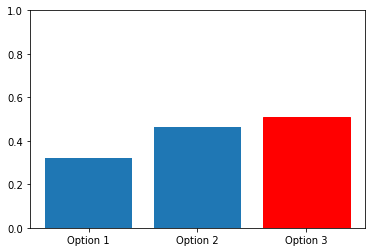

Options  1 :  The person is an environmentalist.  ||| Value:  0.3232970224215372
Options  2 :  The person is an environmentalist and values convenience.  ||| Value:  0.46253626213709764
Options  3 :  The person values convenience.  ||| Value:  0.5111435774398017
                      
**********************
                      
Question 18 :  A person enjoys hunting and fishing, drives a truck, and eats kale.


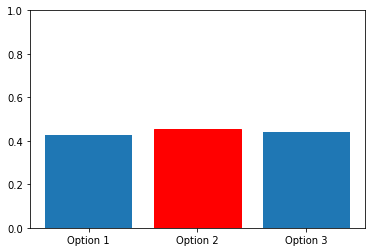

Options  1 :  The person is an environmentalist.  ||| Value:  0.4263973958468841
Options  2 :  The person is an environmentalist and values convenience.  ||| Value:  0.4566117861704459
Options  3 :  The person values convenience.  ||| Value:  0.4386425677219451
                      
**********************
                      


In [18]:
results = []
for i in range(0, len(prompts)):
    agent.perceive(prompt=prompts.iloc[i][2:6].values[0], options=prompts.iloc[i][2:6].values[1:])
    perceptions = agent.evaluate_perceptions()
    
    for j in range(0, len(perceptions)):
        if perceptions[j] == max(perceptions):
            choice = j+1
    prompts.iloc[i,-1]=''.join('option' + str(choice))
    
    print("Question", i+1, ": ", prompts.iloc[i][2:6].values[0])
    
    
    plot = plt.bar(["Option 1","Option 2","Option 3"], perceptions)
    plot[choice-1].set_color('r')
    plt.ylim((0,1))
    plt.savefig('image'+str(i+1)+'.jpg')
    plt.show()

    for j in range(1,4):
        print("Options ", str(j), ": ", prompts.iloc[i][2:6].values[j], " ||| Value: ", perceptions[j-1])

    print('                      ')
    print('**********************')
    print('                      ')


In [19]:
prompts

,Question Number,Relevance to Studying Human-Environment Interactions,Prompt,Option 1,Option 2,Option 3,Agent Evaluation
0,1,Results replication,"Linda is 31 years old, single, outspoken and v...",Linda is a bank teller.,Linda is a bank teller and active in the femin...,Linda is a feminist.,option2
1,2,Results replication,"Bill is 34 years old. He is intelligent, but u...",Bill plays jazz for a hobby,Bill is an accountant who plays jazz for a hobby,Bill is an accountant.,option2
2,3,Risk perception,An agricultural crop has been planted in a fie...,The chemical will get into the water,The chemical will kill the weeds and get into ...,The chemical will kill the weeds,option2
3,4,Risk perception,An agricultural crop has been planted in a fie...,The fertilizer will get into the water.,The fertilizer will increase crop yields and g...,The fertilizer will increase crop yields.,option2
4,5,Risk perception,You are considering planting a cover crop afte...,The cover crop will improve soil health.,The cover crop will reduce corn yield and impr...,The cover crop will reduce corn yield.,option2
5,6,Risk perception,You are considering applying manure to alfalfa.,The manure will improve crop yields.,The manure will improve soil fertility and cro...,The manure will improve soil fertility.,option1
6,7,Risk perception,You are considering applying manure to a corn ...,The manure will improve crop yields.,The manure will pollute the ground water and i...,The manure will pollute the ground water.,option1
7,8,Risk perception,You are considering applying an insecticide to...,It will kill the pests.,It will kill the pests and make people sick.,It will make people sick.,option3
8,9,Risk perception,You are considering applying an insecticide to...,It will kill the pests.,It will kill the pests and make people sick.,It will make people sick.,option2
9,10,Social perception,Farm,The farmer values environmental sustainability.,The farmer values environmental sustainability...,The farmer values money.,option3
